#  Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


#Loading the Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [3]:
import os
os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [4]:
df = pd.read_csv(path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#Overview of Dataset Columns and Null Counts

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Missing Value Counts

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Statistical Summary of Numerical Features

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Pie Chart

It represnts the distribution of values in the coloumn"Churn" from a data set

There are 2 main categories

*   First -73.5% of the customers did not churn (did not leave the service).

*   Second -26.5% of the customers churned (left the service).



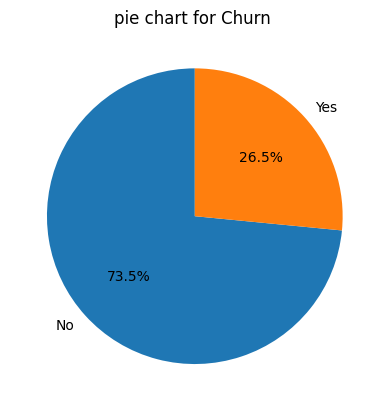

In [8]:
label = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
plt.pie(sizes, labels = label, autopct = '%1.1f%%', startangle=90)
plt.title('pie chart for Churn ')
plt.show()

#Contract vs Churn

Customers with longer-term contracts are less likely to churn.

Month-to-month customers are more at risk of leaving and may need more retention strategies.


Text(0.5, 1.0, 'Contract Distribution')

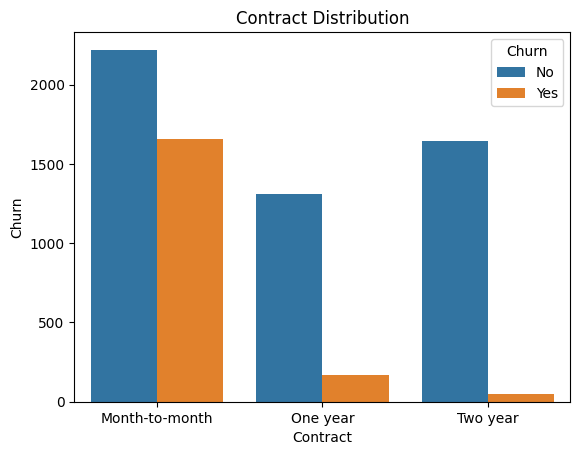

In [9]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.title('Contract Distribution')

#Monthly Charges vs Churn

1. Customers who churned (Yes):
Tend to have higher monthly charges

2. Customers who stayed (No):
Have lower and more consistent monthly charges.


Higher monthly charges are associated with a higher chance of churn

Text(0.5, 1.0, 'Monthly Charges Distribution')

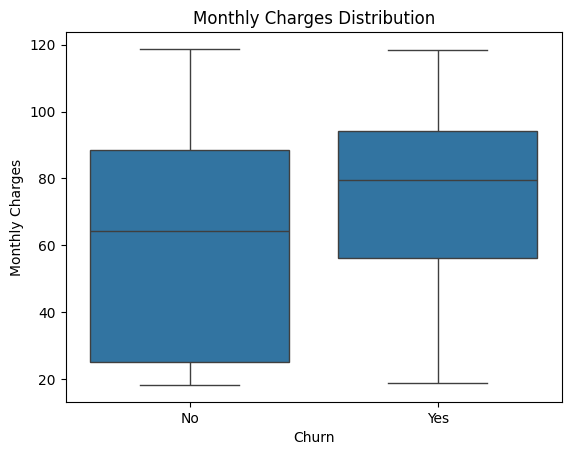

In [10]:
sns.boxplot(y='MonthlyCharges', x='Churn', data=df)
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')
plt.title('Monthly Charges Distribution')

#Payment Method vs Churn

1. Electronic Check:
Has the highest churn rate

2. Mailed Check, Bank Transfer (automatic), and Credit Card (automatic):
Majority of these users did not churn

Customers using automatic payment methods (like bank transfer or credit card) are less likely to churn.

Customers paying via electronic check are more likely to churn.

This suggests that promoting automatic payment options could help reduce churn.


Text(0.5, 1.0, 'Payment Method Distribution')

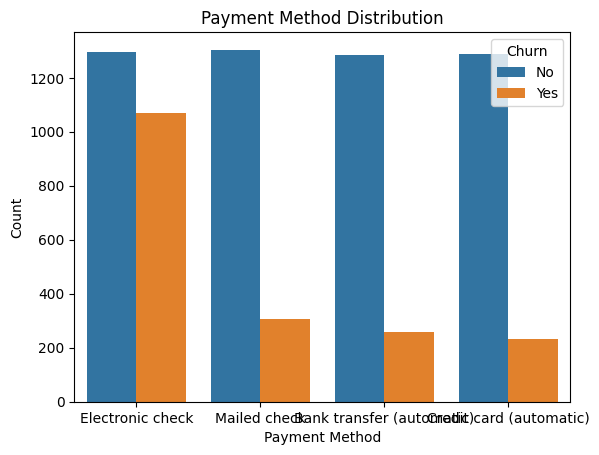

In [11]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method Distribution')

#Internet Service vs Churn

1. Fiber optic users:
Have the highest churn rate

2. DSL users:
Mostly stayed

3. Customers with no internet service:
Rarely churn

Fiber optic service is associated with the highest churn rate

DSL users are more stable and loyal.

Customers with no internet service rarely churn — probably because they use fewer services.


Text(0.5, 1.0, 'Internet Service Distribution')

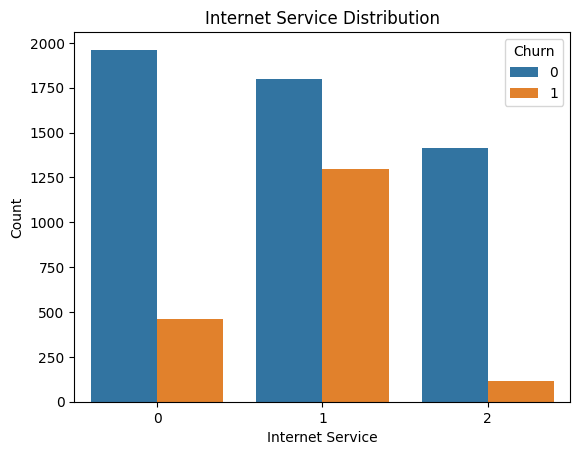

In [24]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Internet Service Distribution')

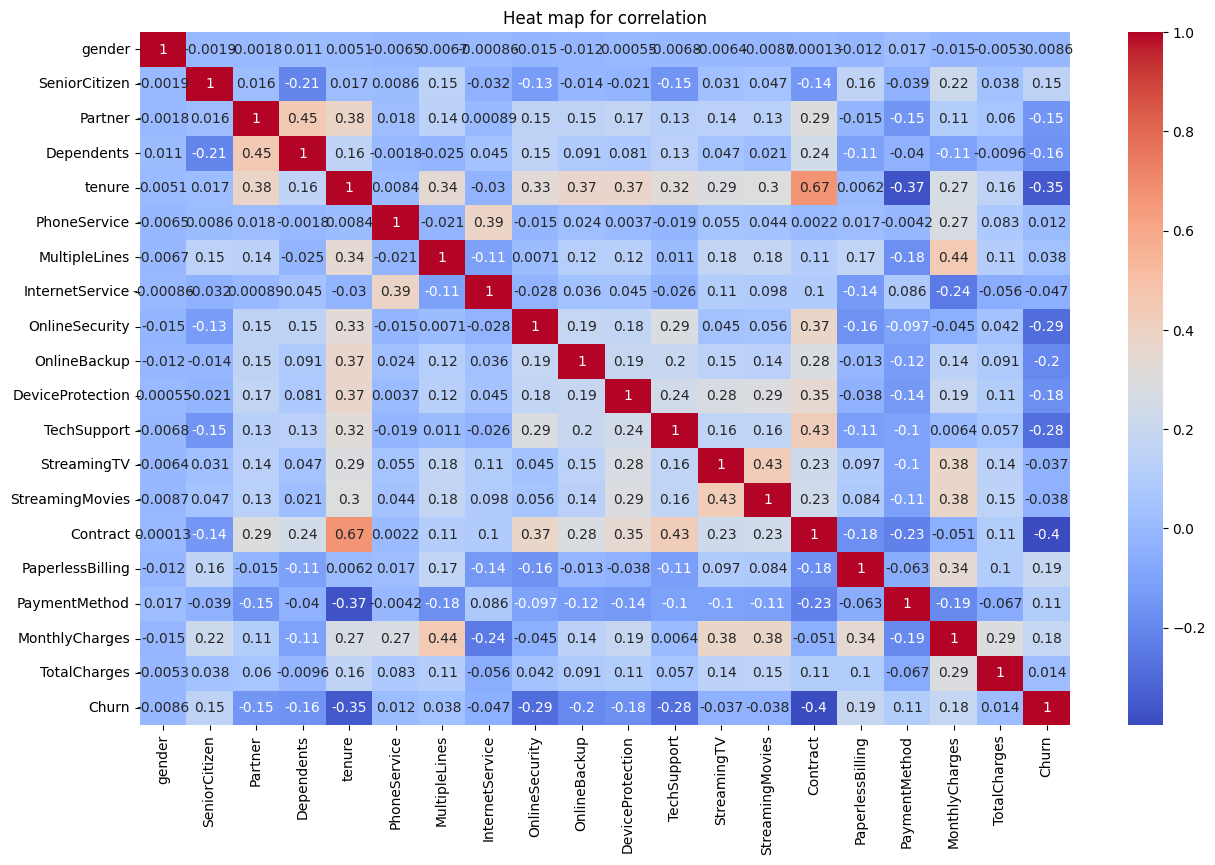

In [30]:
plt.figure(figsize=(15,9))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Heat map for correlation')
plt.show()

# Converting Categorial value to Numeric Value

In [13]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
df['gender'] = le.fit_transform(df['gender'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['Partner'] = le.fit_transform(df['Partner'])
df['SeniorCitizen'] = le.fit_transform(df['SeniorCitizen'])
df['MonthlyCharges'] = le.fit_transform(df['MonthlyCharges'])
df['TotalCharges'] = le.fit_transform(df['TotalCharges'])


# Standardising The Data

In [14]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(df.drop([ 'customerID'], axis=1))
x_scale

array([[-1.00955867, -0.43991649,  1.03453023, ..., -1.13176632,
        -0.39860759, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.38773977,
        -0.94876238, -0.60102348],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -0.51731743,
        -1.64188328,  1.66382851],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ..., -1.14221613,
        -0.13968008, -0.60102348],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.23297901,
        -0.31653445,  1.66382851],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.4723266 ,
         1.13801338, -0.60102348]])

#"Dimensionality Reduction Using PCA

In [15]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scale)
x_pca

array([[-2.02016674, -0.71287643],
       [-1.02490448, -1.86154882],
       [-2.81928775, -0.51081553],
       ...,
       [-1.47445597, -1.63891164],
       [-2.78113017,  1.84263768],
       [ 2.90121318,  0.67667614]])

#Feature Selection and Dataset Splitting

In [16]:
x= df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'tenure', 'MonthlyCharges', 'TotalCharges']]

y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardization of Training and Testing Data for Model Input


In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Checking the Shape of Training and Testing Sets

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 19)
(1409, 19)
(5634,)
(1409,)


#Training the Logistic Regression Model

In [19]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#Making Predictions on Test Data

In [20]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

#Training the Random Forest Classifier

In [21]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

#Evaluating Model Performance Using Accuracy, Confusion Matrix, and Classification Report

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('Logictic Regression accuracy :', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logictic Regression accuracy : 0.8140525195173882
[[934 102]
 [160 213]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



#Neural Network Model Training and Accuracy Visualization Over Epochs

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7504 - loss: 0.5192 - val_accuracy: 0.7871 - val_loss: 0.4406
Epoch 2/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7889 - loss: 0.4322 - val_accuracy: 0.7963 - val_loss: 0.4241
Epoch 3/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7920 - loss: 0.4331 - val_accuracy: 0.8006 - val_loss: 0.4170
Epoch 4/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7980 - loss: 0.4233 - val_accuracy: 0.8013 - val_loss: 0.4124
Epoch 5/5
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4239 - val_accuracy: 0.8041 - val_loss: 0.4122


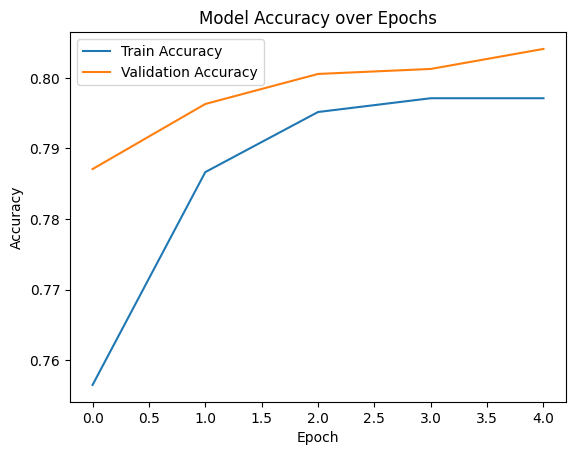

In [23]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary classification

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model with epochs
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Plot Accuracy over Epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy over Epochs')
plt.legend()
plt.show()